In [93]:
# import and use cnn, use pytorch and tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns

# print the entire array
np.set_printoptions(threshold=np.inf)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# import data
df = pd.read_csv('../../codes/sml/project/train.csv')
df.head()

# convert all string labels to codes
categories_list = df[ 'category' ].astype( 'category' ).cat.categories
df[ 'category' ] = df[ 'category' ].astype('category').cat.codes
# store category codes in y

# count number of occurences of each category
counts = df[ 'category' ].value_counts()
# store category names in a list
categories = counts.index.tolist()
# store category counts in a list
counts = counts.tolist()
print(categories)
print(counts)

data = np.array(df.values)

# drop first column
data = data[:,1:]
print(data.shape)

# split the data into X and y
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y)

[3, 1, 0, 15, 19, 10, 18, 2, 5, 16, 17, 7, 9, 4, 13, 14, 12, 11, 6, 8]
[86, 81, 78, 77, 75, 72, 65, 63, 58, 58, 57, 56, 55, 54, 54, 51, 48, 46, 45, 37]
(1216, 4097)
(1216, 4096)
[13.  3. 10.  8. 11. 15.  7.  1. 17.  1.  6. 15.  8.  8. 13.  7. 18. 11.
  0.  9. 15. 15. 14.  9. 10. 19. 19. 19.  0. 11. 14. 14. 16.  5.  1.  5.
 19. 13. 19. 10. 13. 19.  1.  9.  5.  2.  4. 12. 17.  5.  7.  1.  2.  7.
 15.  3.  2. 18. 15.  1.  3.  1. 17.  3.  0.  0. 11.  9. 13.  9.  4. 16.
 18. 11. 10.  6.  6. 12. 11.  1.  3.  2. 17.  7.  3. 10.  9. 12.  2. 10.
 10.  1.  4.  5.  1.  6. 11.  7.  7.  7. 11.  0.  2. 19. 18.  5.  1. 17.
 15. 13. 17.  4. 19.  0.  4.  1.  8.  4. 15. 19. 15.  5. 17. 15. 14. 16.
  9. 12. 18.  8. 10.  1.  2. 10.  5. 16.  7. 15.  8. 17.  7. 16.  9. 14.
 12. 15.  8.  4.  7.  3.  1. 17.  3.  6.  0. 17.  9. 17. 18. 11.  8. 19.
 15.  4.  2. 17.  9.  9.  6.  2. 10.  4.  9. 19. 15. 12. 19.  0.  7.  1.
  0.  0. 16. 16. 12.  8.  1. 19. 11. 17.  6. 18. 16. 15. 12. 13. 19.  5.
  4.  2. 19. 19.  2

## Remove outliers

In [ ]:
# remove outliers using isolation forest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 1, contamination = 0.0045)
clf.fit(X)
y_pred = clf.predict(X)
X = X[y_pred == 1]
y = y[y_pred == 1]
print(X.shape)
print(y.shape)



# remove outliers using z-score


(1210, 4096)
(1210,)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Normalize feature values to be between 0 and 1
print(X_train.max())
print(X_test.max())

# get global max
max_val = max(X_train.max(), X_test.max())
print(max_val)

# normalize
X_train = X_train / max_val
X_test = X_test / max_val


4.580862045
4.485429764
4.580862045


In [ ]:
# run pca on the data
# from sklearn.decomposition import PCA
# pca = PCA(n_components=900)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)


# # reshape the data to be 3D
# X_train = X_train.reshape(X_train.shape[0], 30, 30, 1)
# X_test = X_test.reshape(X_test.shape[0], 30, 30, 1)


/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_6621/1972844546.py:10: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  plt.xlabel(categories_list[y_train[i]])


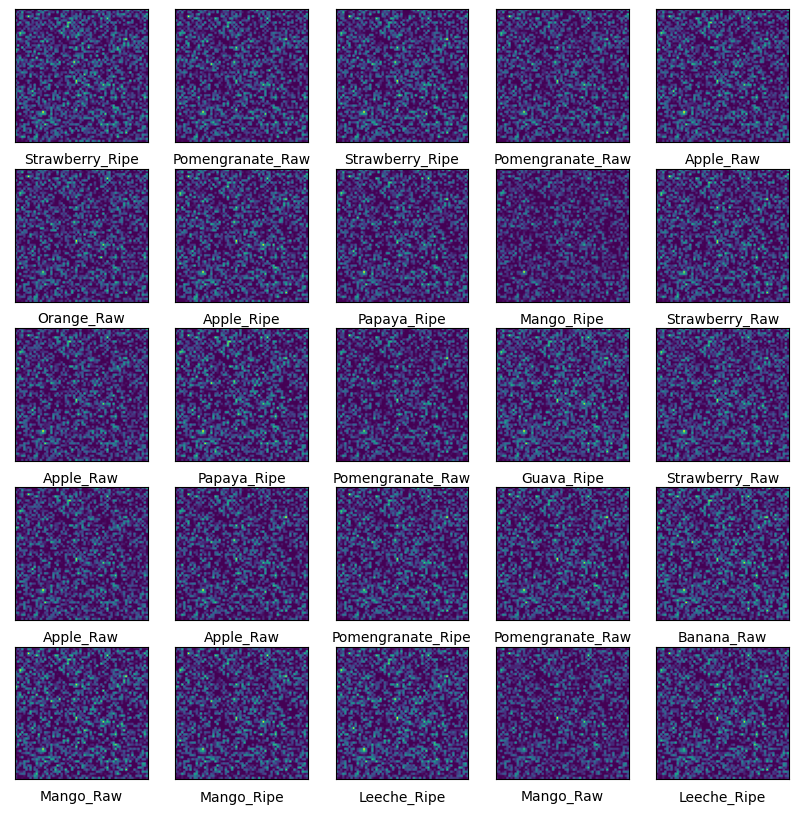

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(64, 64))
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(categories_list[y_train[i]])
plt.show()

In [ ]:
from tensorflow.keras import regularizers

model = models.Sequential()
# model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=regularizers.l1_l2(0.001)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.45))
# model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.45))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(20))



model.summary()


# model = models.Sequential()
# model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1), 
#                         kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', 
#                         kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.Dropout(0.4))
# model.add(layers.MaxPooling2D((2, 2)))



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 31, 31, 128)       0         
                                                                 
Total params: 1,280
Trainable params: 1,280
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.add(layers.Flatten(name='flatten'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(20, activation='softmax'))



model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
# # model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))




model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 31, 31, 128)       0         
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense_30 (Dense)            (None, 256)               31490304  
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                     

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

history = model.fit(X_train.reshape(X_train.shape[0], 64, 64, 1), y_train, epochs=100, 
                    validation_data=(X_test.reshape(X_test.shape[0], 64, 64, 1), y_test))



# # model.summary()
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(X_train.reshape(X_train.shape[0], 64, 64, 1), y_train, epochs=90, 
#                     validation_data=(X_test.reshape(X_test.shape[0], 64, 64, 1), y_test))


Epoch 1/100


/opt/homebrew/lib/python3.9/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 3s 97ms/step - loss: 3.1360 - accuracy: 0.0761 - val_loss: 3.0190 - val_accuracy: 0.0693
Epoch 2/100
29/29 [==============================] - 3s 99ms/step - loss: 2.9822 - accuracy: 0.1080 - val_loss: 2.9109 - val_accuracy: 0.1650
Epoch 3/100
29/29 [==============================] - 3s 97ms/step - loss: 2.8377 - accuracy: 0.1632 - val_loss: 2.6239 - val_accuracy: 0.2640
Epoch 4/100
29/29 [==============================] - 3s 100ms/step - loss: 2.5923 - accuracy: 0.2172 - val_loss: 2.2899 - val_accuracy: 0.3762
Epoch 5/100
29/29 [==============================] - 3s 102ms/step - loss: 2.2823 - accuracy: 0.3186 - val_loss: 1.8986 - val_accuracy: 0.4455
Epoch 6/100
29/29 [==============================] - 3s 97ms/step - loss: 2.0264 - accuracy: 0.3870 - val_loss: 1.6995 - val_accuracy: 0.5215
Epoch 7/100
29/29 [==============================] - 3s 97ms/step - loss: 1.8381 - accuracy: 0.4212 - val_loss: 1.7208 - val_accuracy: 0.4917
Epoch 8/100
29/2

KeyError: 'val_accuracy'

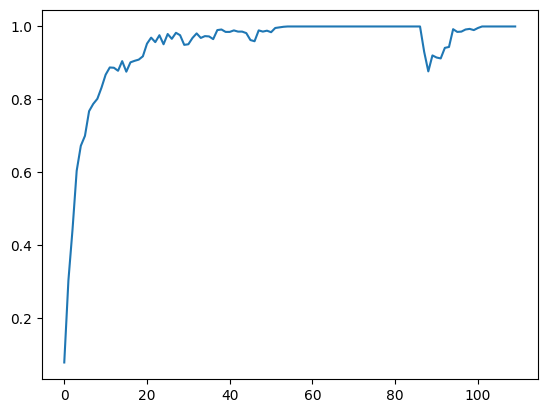

In [ ]:
# add grid lines
# CHANGE figsize
# use seaborn




plt.figure(figsize=(6, 5))
# add title
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



test_loss, test_acc = model.evaluate(X_test.reshape(X_test.shape[0], 64, 64, 1),  y_test, verbose=2)

In [ ]:
# import test data
df_test = pd.read_csv('../../codes/sml/project/test.csv')
df_test.head()

# import train data
df_train = pd.read_csv('../../codes/sml/project/train.csv')
df_train.head()

data_test = np.array(df_test.values)
data_test = data_test[:,1:]
print(data_test.shape)

# standardize the test data
print(X.max())
print(X_test.max())
print(data_test.max())

# get global max
max_val = max(X.max(), data_test.max())

# normalize
data_test = data_test / max_val
X = X / max_val

model2 = models.Sequential()
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Dropout(0.45))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten(name='flatten'))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(20, activation='sigmoid'))

model2.summary()

model2.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# fit X, y and predict on test data
history = model2.fit(X.reshape(X.shape[0], 64, 64, 1), y, epochs=110)

# predict on test data
y_pred = model2.predict(data_test.reshape(data_test.shape[0], 64, 64, 1))

# change the labels to the original labels
y_pred = y_pred.astype(int)
y_pred = categories_list[y_pred]

# write the predictions to a csv file
with open( 'cnn_1c128_1mp2_3d87.csv' ,  'w' , newline='')  as  csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow([ 'ID' ,  'Category' ])
    for i in range(len(y_pred)):
        print(i)
        writer.writerow([i, y_pred[i]])






# # do pca on the test data
# # data_test = pca2.transform(data_test)

# # run neural network on test data
# y_pred = clf.predict(data_test)

# # change the labels to the original labels
# y_pred = y_pred.astype(int)
# y_pred = categories_list[y_pred]

# # write the predictions to a csv file
# with open( 'nn_wo_pca_4_layer.csv' ,  'w' , newline='')  as  csvfile:
#     writer = csv.writer(csvfile, delimiter=',',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     writer.writerow([ 'ID' ,  'Category' ])
#     for i in range(len(y_pred)):
#         writer.writerow([i, y_pred[i]])

(415, 4096)
4.580862045
0.9791671785654047
4.417367935
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 128)       1280      
                                                                 
 dropout_18 (Dropout)        (None, 62, 62, 128)       0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense_33 (Dense)            (None, 256)               31490304  
                                                                 
 dense_34 (Dense)            (None, 128)               32896    

/opt/homebrew/lib/python3.9/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 [==============================] - 5s 126ms/step - loss: 3.0559 - accuracy: 0.0785
Epoch 2/110
38/38 [==============================] - 4s 118ms/step - loss: 2.4636 - accuracy: 0.3033
Epoch 3/110
38/38 [==============================] - 4s 109ms/step - loss: 1.7809 - accuracy: 0.4438
Epoch 4/110
38/38 [==============================] - 4s 107ms/step - loss: 1.2633 - accuracy: 0.6041
Epoch 5/110
38/38 [==============================] - 4s 109ms/step - loss: 1.0124 - accuracy: 0.6727
Epoch 6/110
38/38 [==============================] - 4s 110ms/step - loss: 0.8855 - accuracy: 0.7000
Epoch 7/110
38/38 [==============================] - 4s 109ms/step - loss: 0.7288 - accuracy: 0.7678
Epoch 8/110
38/38 [==============================] - 4s 112ms/step - loss: 0.6332 - accuracy: 0.7876
Epoch 9/110
38/38 [==============================] - 4s 110ms/step - loss: 0.5658 - accuracy: 0.8017
Epoch 10/110
38/38 [==============================] - 4s 109ms/step - loss: 0.4914 - accuracy: 0.8322
E

/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_6621/1414498970.py:51: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_pred = categories_list[y_pred]


In [ ]:
y_pred = model2.predict(data_test.reshape(data_test.shape[0], 64, 64, 1))
print(y_pred)

# get the index of the highest probability
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

# change the labels to the original labels
y_pred = y_pred.astype(int)
y_pred = categories_list[y_pred]

# write the predictions to a csv file
with open( 'cnn_1c128_1mp2_3d87.csv' ,  'w' , newline='')  as  csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow([ 'ID' ,  'Category' ])
    for i in range(len(y_pred)):
        print(i)
        writer.writerow([i, y_pred[i]])


13/13 [==============================] - 0s 20ms/step
[[4.91329795e-03 4.86577978e-09 1.24323659e-03 7.24302396e-09
  1.62806967e-03 1.58566438e-09 5.35761416e-01 1.60743321e-10
  1.00000000e+00 7.14338431e-03 9.99949455e-01 1.39362717e-04
  9.99974728e-01 1.35753297e-07 3.88305075e-03 8.16416934e-10
  1.24374566e-09 6.41847754e-14 9.70340669e-01 3.41620948e-03]
 [9.16609764e-01 6.44832107e-05 2.39373804e-07 2.29427670e-07
  2.70374403e-05 1.46368861e-09 3.15861315e-01 1.33697745e-06
  2.17473153e-02 2.58749439e-10 9.99635339e-01 8.93377244e-01
  9.99999940e-01 1.57834133e-04 7.50401318e-02 2.93196190e-05
  1.88480190e-04 1.09537105e-07 4.84532490e-03 1.50253063e-05]
 [2.42200214e-02 9.99999881e-01 1.99938129e-13 1.41815303e-12
  1.80333836e-06 8.59631002e-01 8.63260505e-11 1.59062650e-02
  5.37774838e-08 9.96106684e-01 1.36241008e-12 7.52928555e-02
  8.18559784e-04 5.07684529e-01 3.59619168e-10 8.53470410e-04
  9.89865005e-01 1.00000000e+00 2.43343168e-09 9.99954641e-01]
 [5.30271173e

In [ ]:
print(y_pred)



Index(['Leeche_Raw', 'Orange_Raw', 'Pomengranate_Ripe', 'Strawberry_Raw',
       'Orange_Ripe', 'Banana_Ripe', 'Orange_Ripe', 'Apple_Ripe',
       'Coconut_Ripe', 'Coconut_Ripe',
       ...
       'Strawberry_Ripe', 'Coconut_Ripe', 'Banana_Ripe', 'Mango_Raw',
       'Mango_Raw', 'Orange_Ripe', 'Mango_Ripe', 'Banana_Ripe', 'Orange_Raw',
       'Strawberry_Raw'],
      dtype='object', length=415)


In [ ]:
# use the output from the flatten layer to perform logistic regression
layer_dict = dict([(layer.name, layer) for layer in model2.layers])
print(layer_dict)
# input tensor
input_tensor = model.input

# output tensor of the given layer
layer_output = layer_dict['flatten'].output

# get the output with respect to the input
func = K.function([input_tensor], [layer_output])

# pass X_train to the function, get the output
activation = func([X_train.reshape(X_train.shape[0], 64, 64, 1)])[0]

print(activation.shape)

# print the shape of the activation
# print(activation.shape)

{'conv2d_11': <keras.layers.convolutional.conv2d.Conv2D object at 0x16c5d6f70>, 'dropout_18': <keras.layers.regularization.dropout.Dropout object at 0x16c4da1f0>, 'max_pooling2d_11': <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2bab81880>, 'flatten': <keras.layers.reshaping.flatten.Flatten object at 0x2f3d75940>, 'dense_33': <keras.layers.core.dense.Dense object at 0x2bab8aeb0>, 'dense_34': <keras.layers.core.dense.Dense object at 0x2bab8af70>, 'dense_35': <keras.layers.core.dense.Dense object at 0x2bab81b80>}


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='conv2d_11_input'), name='conv2d_11_input', description="created by layer 'conv2d_11_input'") at layer "conv2d_11". The following previous layers were accessed without issue: []

In [ ]:
LR_X_train = activation
LR_y_train = y_train

# detect and show outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.02)
clf.fit(LR_X_train)
y_pred_train = clf.predict(LR_X_train)
print(y_pred_train)

# remove outliers
LR_X_train = LR_X_train[y_pred_train == 1]
LR_y_train = LR_y_train[y_pred_train == 1]


# run logistic regression on the output of the flatten layer
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
logreg.fit(LR_X_train, LR_y_train)

# get the output of the flatten layer for the test data
LR_X_test = func([X_test.reshape(X_test.shape[0], 64, 64, 1)])[0]

print(LR_X_test.shape)
print(y_test.shape)
print(LR_X_train.shape)
print(LR_y_train.shape)

# get the predictions
y_pred = logreg.predict(LR_X_test)

# get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

KeyboardInterrupt: 